# Retail Analytics~

# Exploratory DATA ANALYSIS

# Content:

We have been given three CSV files:
1. Features Dataset
2. Sales Dataset
3. Store Dataset

# One challenge of modeling retail data is the need to make decisions based on limited history. 

We are provided with historical sales data for 45 stores located in different regions - each store contains a number of departments. The company also runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks.

# Stores
Anonymized information about the 45 stores, indicating the type and size of store

# Features
Contains additional data related to the store, department, and regional activity for the given dates.

1. Store - the store number
2. Date - the week
3. Temperature - average temperature in the region
4. Fuel_Price - cost of fuel in the region
5. MarkDown1-5 - anonymized data related to promotional markdowns. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA
6. CPI - the consumer price index
7. Unemployment - the unemployment rate
8. IsHoliday - whether the week is a special holiday week

# Sales
Historical sales data, which covers to 2010-02-05 to 2012-11-01. Within this tab you will find the following fields:

1. Store - the store number
2. Dept - the department number
3. Date - the week
4. Weekly_Sales -  sales for the given department in the given store
5. IsHoliday - whether the week is a special holiday week

# LET'S START

In [3]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [13]:
#importing the CSV files
df_store = pd.read_csv('stores data-set.csv')
df_features = pd.read_csv('Features data set.csv', parse_dates=['Date'])
df_sales = pd.read_csv('sales data-set.csv', parse_dates=['Date'])

# Sneak Peak into the Data

In [14]:
#checking the top 5 rows and columns for each column
df_store.head(5)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [15]:
df_features.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-12-02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-05-03,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [16]:
df_sales.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,False
1,1,1,2010-12-02,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-05-03,21827.90,False


In [18]:
df_store.info()
df_store.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [19]:
df_features.info()
df_features.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB


,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [20]:
df_sales.info()
df_sales.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


Based on the above output, we can conclude that we can group data based on time, store and department. 
Also, we can check how holidays, temperature, fuel_price, CPI, Unemployment, Type of Store affecting sales.

# ANALYSIS DATEWISE

Let explore data based on the timeline

1. lets Merge Feature tables and sales tables based on the date
2. we will convert WeeklySales in Millions
3. we will modify column as the day is holiday or not

In [21]:
data_date = df_features.groupby('Date').agg({"Temperature":"mean",
                                            "Fuel_Price": "mean",
                                            "IsHoliday":"sum",
                                            "CPI":"mean",
                                            "Unemployment":"mean"})
data_date = data_date.sort_index()

In [38]:
temp_date_data = data_date[:'2012-12-10']
data_sales_date = df_sales.groupby("Date").agg({"Weekly_Sales":"sum"})
data_sales_date.sort_index(inplace=True)
data_sales_date.Weekly_Sales = data_sales_date.Weekly_Sales/1000000    #converting into millions
data_sales_date.Weekly_Sales = data_sales_date.Weekly_Sales.apply(int)
data  = pd.merge(data_sales_date, temp_date_data, left_index=True,right_index=True, how='left')
data["IsHoliday"] = data["IsHoliday"].apply(lambda x: True if x == 45.0 else False )

In [39]:
data.describe()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,143.000000,143.000000,143.000000,143.000000,143.000000
mean,46.601399,60.663782,3.358607,171.578394,7.999151
std,5.399713,15.172792,0.429401,3.100148,0.483853
min,39.000000,30.480889,2.672067,167.546485,6.953711
25%,44.000000,47.720222,2.885367,168.408144,7.508333
50%,46.000000,61.051111,3.488644,171.386189,8.150133
75%,47.000000,74.697333,3.726133,174.724576,8.428578
max,80.000000,82.176444,3.997778,176.652613,8.619311


<AxesSubplot:title={'center':'Unemployment'}, xlabel='Date'>

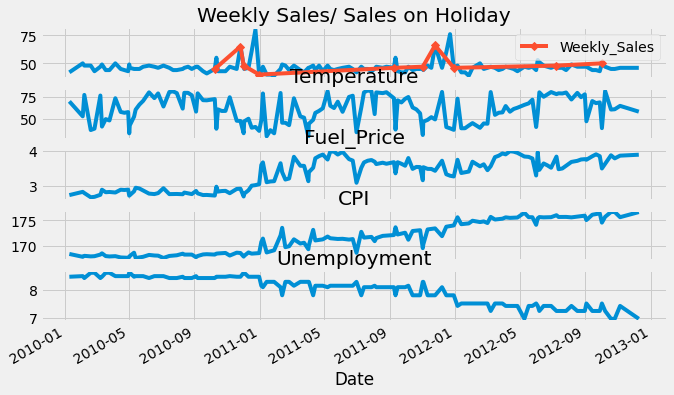

In [40]:
#Impleting FIVETHIRTHYEIGHT graph for easy understanding of our visualisation

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(5,1, figsize = (10,6), sharex= True)
data['Weekly_Sales'].plot(ax=ax[0], title = 'Weekly Sales/ Sales on Holiday')
data[data.IsHoliday==True]['Weekly_Sales'].plot(marker = 'D', ax = ax[0], legend='Holiday Week Sale')
data["Temperature"].plot(ax=ax[1], title="Temperature")
data["Fuel_Price"].plot(ax=ax[2],title="Fuel_Price")
data["CPI"].plot(ax=ax[3],title="CPI")
data["Unemployment"].plot(ax=ax[4],title="Unemployment")

# Inference
1. Nov- Dec shows spike in Weekly Sales.but over the year it is not increased.
2. weeks nearby holiday shows peak
3. Fuel Price and Consumer Price Index shown growth over the year.
4. Unemployment decreased year after year.
5. Temperature is showing a random walk

<AxesSubplot:>

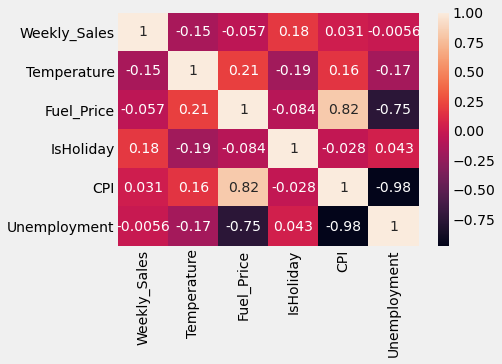

In [42]:
sns.heatmap(data.corr(),annot=True)     #Always give the annotation for your reference

# Inference
1. Weekly sales are slightly correlated to IsHoliday(neither negative nor positive)
2. CPI and Unemployment shows negative correlation 
3. Fuel Price and CPI shows positive correlation.
4. Unemployment and Fuel_price are negatively correlated.

In [48]:
data_sales_month = data.groupby(data.index.month).agg({"Weekly_Sales":"sum"})

Text(0.5, 1.0, 'Monthly Wise Sales')

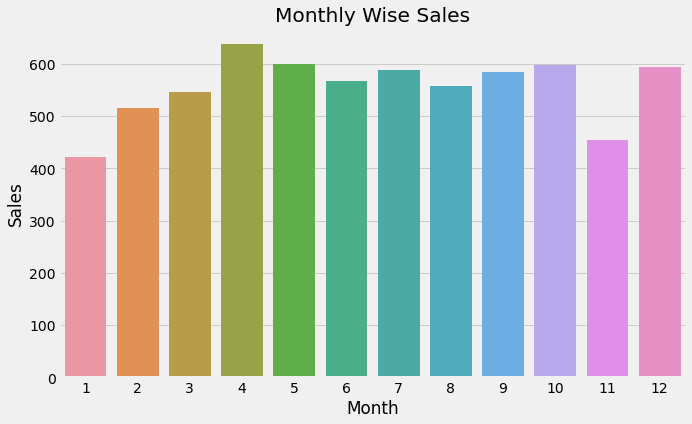

In [49]:
plt.figure(figsize=(10,6))
sns.barplot(x=data_sales_month.index, y=data_sales_month.Weekly_Sales)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Wise Sales')

# Inference:
1. It could be as Enough buying during offer and holidays (Black friday Sales,Chrismas,New year) and later sales go down and then again gaining momentum in some months.
2. In Nov also people show less buying can be waiting period for upcoming sales.
3. whole data for Dec-2013 I guess is not available so even after spike in Dec the sales are not gone very high.

In [51]:
data_sales_year = data.groupby(data.index.year).agg({'Weekly_Sales':'sum'})

In [53]:
data_sales_year.head()

,Weekly_Sales
Date,
2010,2264
2011,2419
2012,1981


Text(0, 0.5, 'Sales')

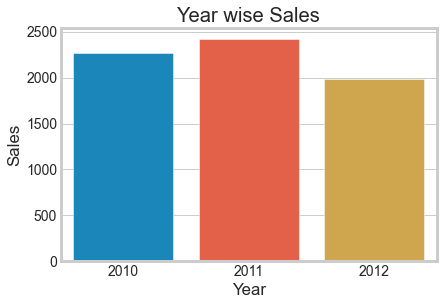

In [56]:
sns.set_style('whitegrid')
sns.barplot(x=data_sales_year.index, y = data_sales_year.Weekly_Sales)
plt.title("Year wise Sales")
plt.xlabel("Year")
plt.ylabel("Sales")

# Inference:
From the above graph, we can clearly see that 2011 is the year of maximum Weekly sales, 2010 being the second and 2012 is the least.

# ANALYSIS STOREWISE

In [58]:
df_store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [61]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-12-02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-05-03,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [63]:
#merging stores data and features data

data_store = df_features.groupby("Store").agg({"Temperature":"mean", "Fuel_Price":"mean", "IsHoliday":"sum"})

In [64]:
data_store.head()

,Temperature,Fuel_Price,IsHoliday
Store,,,
1,66.912033,3.259242,13
2,66.728407,3.259242,13
3,70.394176,3.259242,13
4,61.416648,3.254885,13
5,68.224505,3.259242,13


In [66]:
temp_store = df_sales.groupby("Store").agg({"Weekly_Sales":"sum"})
temp_store.Weekly_Sales = temp_store.Weekly_Sales/1000000
temp_store.Weekly_Sales = temp_store.Weekly_Sales.apply(int)
temp_store.head()

,Weekly_Sales
Store,
1,222
2,275
3,57
4,299
5,45


In [70]:
data_store.set_index(np.arange(0,45),inplace=True)
df_store["temp"] = data_store.Temperature
df_store["Fuel_Price"] = data_store.Fuel_Price
df_store["holiday"] = data_store.IsHoliday
df_store["Weekly_Sales"] = temp_store.Weekly_Sales
df_store.head()

,Store,Type,Size,temp,Fuel_Price,holiday,Weekly_Sales
0,1,A,151315,66.912033,3.259242,13,NaN
1,2,A,202307,66.728407,3.259242,13,222.0
2,3,B,37392,70.394176,3.259242,13,275.0
3,4,A,205863,61.416648,3.254885,13,57.0
4,5,B,34875,68.224505,3.259242,13,299.0


In [71]:
df_store.describe()

,Store,Size,temp,Fuel_Price,holiday,Weekly_Sales
count,45.000000,45.000000,45.000000,45.000000,45.0,44.000000
mean,23.000000,130287.600000,59.356198,3.405992,13.0,150.090909
std,13.133926,63825.271991,9.956122,0.153935,0.0,78.780478
min,1.000000,34875.000000,37.921264,3.245945,13.0,37.000000
25%,12.000000,70713.000000,51.866319,3.259242,13.0,78.500000
50%,23.000000,126512.000000,58.107912,3.328764,13.0,140.500000
75%,34.000000,202307.000000,68.504670,3.497874,13.0,200.750000
max,45.000000,219622.000000,75.438077,3.643654,13.0,301.000000


<AxesSubplot:xlabel='Type', ylabel='Weekly_Sales'>

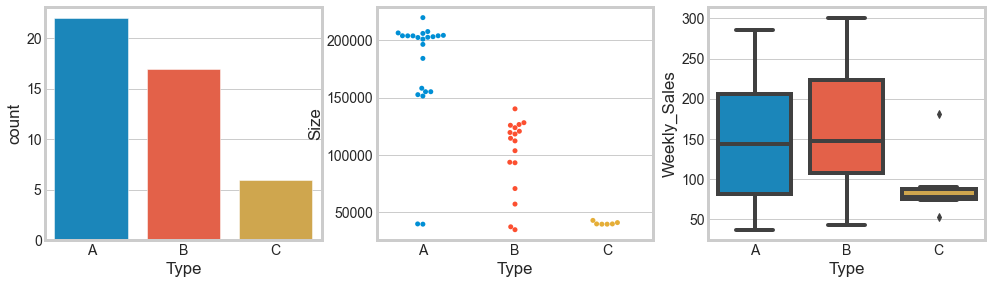

In [72]:
fig,ax = plt.subplots(1,3,figsize=(15, 4))
sns.countplot(df_store.Type,ax=ax[0])
sns.swarmplot(data = df_store,y="Size",x="Type",ax=ax[1])

sns.boxplot(data = df_store,y="Weekly_Sales",x="Type",ax=ax[2])

1. Store Count is in the order of A, B and least is C
2. Size wise A store as most no of Item followed by B and than C
3. Even After less Count of Store and lesser Size B has more Weekly Sales than A and C at the least.

# ANALYSIS DEPARTMENT

In [74]:
len(df_sales["Dept"].unique())

81

In [75]:
data_Dept = df_sales.groupby("Dept").agg({"Weekly_Sales":"sum"})
data_Dept.Weekly_Sales = data_Dept.Weekly_Sales/10000
data_Dept.Weekly_Sales = data_Dept.Weekly_Sales.apply(int)
data_Dept.sort_values(by="Weekly_Sales") 

,Weekly_Sales
Dept,
39,0
78,0
43,0
47,0
51,3
...,...
90,29106
72,30572
38,39311


Text(0.5, 0, 'Department')

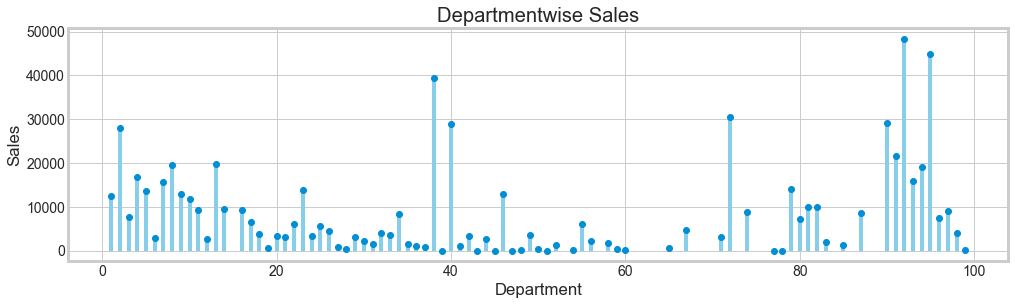

In [83]:
fig1, ax1 = plt.subplots(figsize=(15, 4))
#ordered_df = data_Dept.sort_values(by='Weekly_Sales')
plt.vlines(x=data_Dept.index, ymin=0, ymax=data_Dept['Weekly_Sales'], color='skyblue')
plt.plot(data_Dept.index,data_Dept['Weekly_Sales'], "o")
plt.title("Departmentwise Sales")
plt.ylabel("Sales")
plt.xlabel("Department")

# Inference
1. Here we can see department 1-15 as well as 90-95 has shown higher weekly sales.
2. some department as 38,40,72 has shown higher weekly sales.

# Analysis Store Type and Year/Month Wise


In [85]:
sales_date_store = df_sales.groupby(["Date","Store"]).agg({"Weekly_Sales":"sum"})
sales_date_store.sort_index(inplace=True)
sales_date_store.Weekly_Sales = sales_date_store.Weekly_Sales/10000
sales_date_store.Weekly_Sales = sales_date_store.Weekly_Sales.apply(int)
data_table = pd.merge(df_features,sales_date_store ,  how='left', on=["Date","Store"])
data_table = pd.merge(data_table,df_store[["Store","Type"]] ,  how='left', on=["Store"])
data_table.head(20)
data_train = data_table[data_table.Weekly_Sales.notnull()]
data_test = data_table[data_table.Weekly_Sales.isnull()]

<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

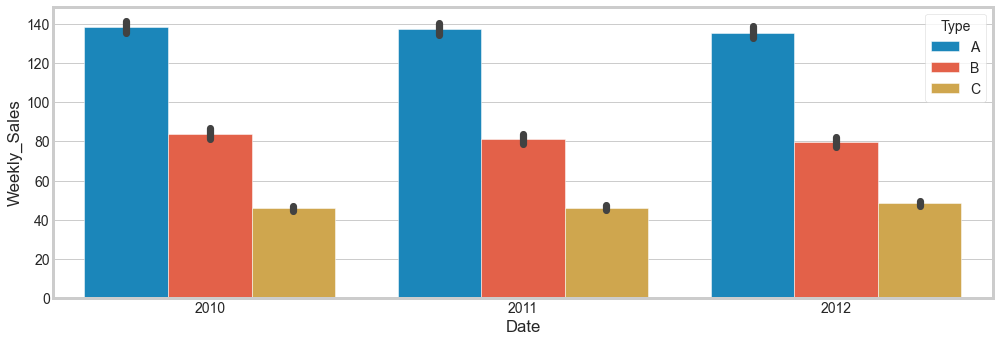

In [87]:
plt.figure(figsize=(15, 5))
sns.barplot(x=data_train.Date.dt.year, y=data_train.Weekly_Sales,hue=data_train.Type)

1. Store Type A & B has shown slight decrease year on basis in sales.
2. Store C has shown a slight increase in sales.

<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

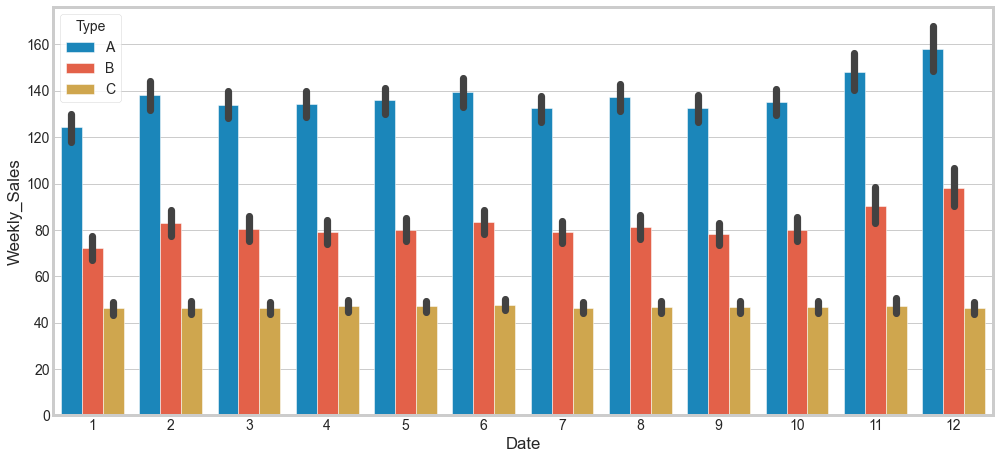

In [88]:
plt.figure(figsize=(15, 7))
sns.barplot(x=data_train.Date.dt.month, y=data_train.Weekly_Sales,hue=data_train.Type)

1. Type A & B store show spike in Nov Dec mostly due to holiday whereas jan has shown decrease in sale.
2. Type C is consistent over every month and doesnot show much deviation.

# THANKYOU!